<b>UFMG<br>
PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA ELÉTRICA<br>
SISTEMAS NEBULOSOS<br>
PROF. WALMIR MATOS CAMINHAS</b>

<br><br><br><br><br><br><br>
# Exercício Computacional: Parte 2
<br><br><br><br><br><br><br>

<b>Aluno: </b>Hélder Seixas Lima
<br><br><br><br><br><br><br>
Belo Horizonte, agosto de 2021.
<br><br>

# Informações sobre a implementação

As estruturas ANFIS e NFN foram implementadas em Python 3 utilizando Jupyter Notebook. Live Script também foram
criados no MATLAB para executar as estruturas GENFIS e ANFIS disponíveis nessa ferramenta. Os códigos implementados
estão anexados no final deste relatório e também no Moodle juntamente com os dados utilizados.

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.io
from neuro_fuzzy.anfis import ANFIS
from neuro_fuzzy.nfn import NFN
from neuro_fuzzy.util import normalizar, embaralhar_dados, exibir_resultado_desejado, atrasar, avancar, ajustar, \
    criar_arquivo, desnormalizar


def descrever_dados(xt, yt, xv, yv):
    print('\n===Dataset xt===');
    print(pd.DataFrame(xt, columns=None));
    print('\n===Dataset yt===');
    print(pd.DataFrame(yt, columns=None));
    print('\n===Dataset xv===');
    print(pd.DataFrame(xv, columns=None));
    print('\n===Dataset yv===');
    print(pd.DataFrame(yv, columns=None));

## Análise da complexidade computacional dos Sistemas de Inferência Fuzzy

Nesta seção serão analisados os comportamentos assintóticos dos algoritmos Adaptive Neuro-Fuzzy inference System
(ANFIS) e Neo-Fyzzy-Neuron (NFN) considerando como operação relevante a execução de uma inferência nessas estruturas.

O ANFIS possui $f(n, m) = \mathcal{O}(n * m)$, onde $n$ é o número de entradas do sistema e $m$ é o número de regras
do sistema.

Como no NFN o número de regras não interfere no tempo de exceução da estrutura, dado que a cada inferência no máximo
apenas 2 funções de pertinências são computadas, temos que para o NFN a $f(n) = \mathcal{O}(n)$. Por ter tempo de
execução menor, o NFN pode ser interessante para contextos de aplciações em tempo real e em treinamento <i>on-line</i>.

Cabe destacar que tanto no ANFIS e no NFN o processo de aprendizagem também considera o número de épocas de treino ($e$)
e o número de pontos de treino ($t$). Assim, temos que a complexidade do processo de aprendizagem do ANFIS e NFN é
$f(e, t, n, m) = \mathcal{O}(e * t * n * m)$ e $f(e, t, n) = \mathcal{O}(e * t * n)$, respectivamente.

O MatLab disponibiliza os métodos Grid Partition, Subtractive Clustering e FCM Clustering com intuito de otimizar a
inicialização de funções de pertinência e regras para estruturas ANFIS.

O método Grid Partition gera funções de pertinência particionando uniformemente os intervalos das variáveis de entrada. É
criada uma regra para cada combinação de função de pertinência e entrada. Assim, o número de regras corresponde a
$m = p^{n}$, onde $p$ é o número de funções de pertinência por entrada. Desta forma o custo de sistema ANFIS
inicializado com este método é $f(n, p) = \mathcal{O}(p^{n})$, tornando esta solução cara para problemas com muitas
entradas.

O método Subtractive Clustering gera um sistema usando funções de pertinência e regras derivadas de <i>clusters</i> de
dados encontrados a partir de algoritmo agrupamento subtrativo considerando dados de entrada e saída. O número de funções
de pertinências por entrada e número de regras corresponde ao número de <i>clusters</i> encontrados pelo algoritmo.
Segundo Chiu (1994), o custo do algoritmo é $f(t) = \mathcal{O}(t^{2})$.

O método FCM Clustering gera um sistema usando funções de pertinência e regras derivadas de <i>clusters</i> de dados
encontrados usando algoritimo de agrupamento FCM a partir de dados de entrada e saída. O número de funções de
pertinências por entrada e número de regras corresponde ao número de <i>clusters</i>, sendo que o número de
<i>clusters</i> é definido por parâmetro. Segundo Ghosh e Dubey (2013), o custo do algoritmo é
$f(t, n, c, i) = \mathcal{O}(t * n * c^{2} * i)$, onde $c$ é o número de <i>clusters</i> e $i$ é o número de iterações
do algoritmo.


## Problema 1: (modelagem de sistema estático monovariável)

Aproximar a função $y=x^2$.

### Carregar dados de treino e validação

In [2]:
xt = scipy.io.loadmat('xte1.mat')['xte1']
ydt = scipy.io.loadmat('ydte1.mat')['ydte1'].T[0]
xv = scipy.io.loadmat('xve1.mat')['xve1']
ydv = scipy.io.loadmat('ydve1.mat')['ydve1'].T[0]

### Resultado desejado

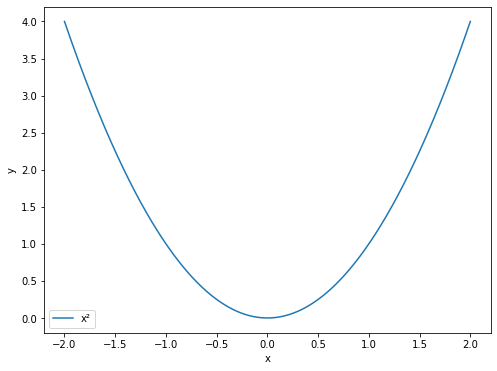

In [3]:
label_y_validacao = "x²"
exibir_resultado_desejado(xv, ydv, label_y_validacao)

### Resumo dos dados de treino e validação

In [4]:
descrever_dados(xt, ydt, xv, ydv)


===Dataset xt===
            0
0    0.151927
1   -1.305227
2   -1.964813
3   -0.095791
4   -1.701748
..        ...
495  0.899214
496  1.975956
497 -1.207648
498  0.010367
499 -0.151371

[500 rows x 1 columns]

===Dataset yt===
            0
0    0.023082
1    1.703617
2    3.860489
3    0.009176
4    2.895945
..        ...
495  0.808586
496  3.904403
497  1.458413
498  0.000107
499  0.022913

[500 rows x 1 columns]

===Dataset xv===
          0
0    -2.000
1    -1.999
2    -1.998
3    -1.997
4    -1.996
...     ...
3996  1.996
3997  1.997
3998  1.998
3999  1.999
4000  2.000

[4001 rows x 1 columns]

===Dataset yv===
             0
0     4.000000
1     3.996001
2     3.992004
3     3.988009
4     3.984016
...        ...
3996  3.984016
3997  3.988009
3998  3.992004
3999  3.996001
4000  4.000000

[4001 rows x 1 columns]


### Estruturas implementadas

#### Parâmetros gerais

In [5]:
n_epoca = 20

#### Estrutura ANFIS

<u>Parâmetros</u>

In [6]:
m = 4
alfa = 0.3
anfis_problema_1 = ANFIS(n_epoca, xt, ydt, xv, ydv, m, label_y_validacao, alfa)

<u>Demonstração de estado inicial</u>

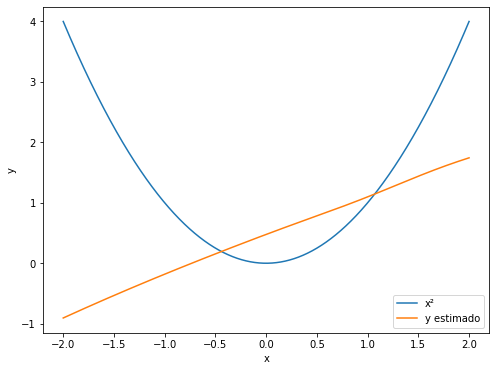

Root mean squared error (RMSE):  1.6713
Mean absolute percentage error (MAPE): 39212.5888%


In [7]:
anfis_problema_1.exibir_resultado_validacao()

<u>Demonstração de treinamento</u>

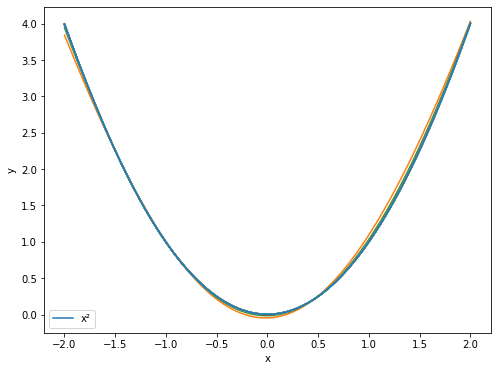

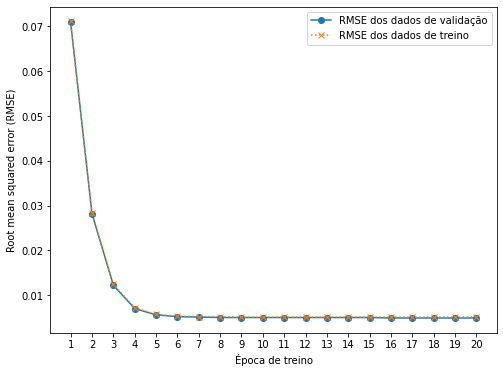

In [8]:
anfis_problema_1.treinar_gradiente(plota_resultado_epocas=True)

<u>Demonstração de resultado final</u>

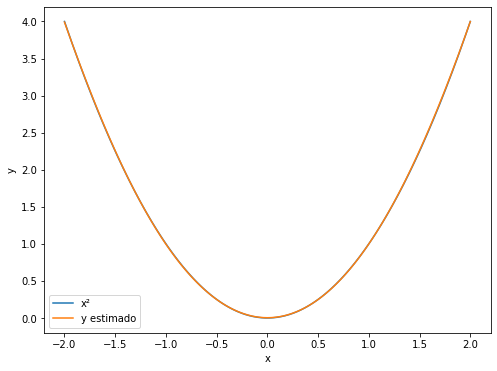

Root mean squared error (RMSE):  0.0049
Mean absolute percentage error (MAPE): 264.5898%


In [9]:
anfis_problema_1.exibir_resultado_validacao()


<u>Resultado médio para 10 treinos</u>

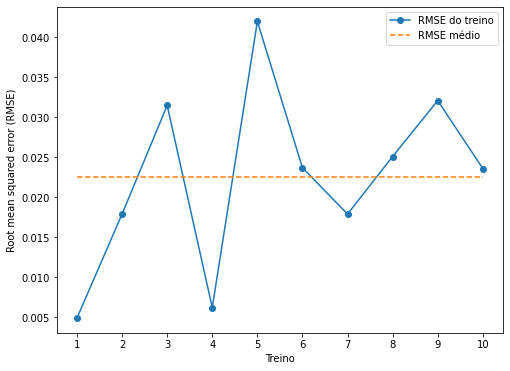

Média do RMSE:  0.0225
Desvio padrão do RMSE:  0.0109


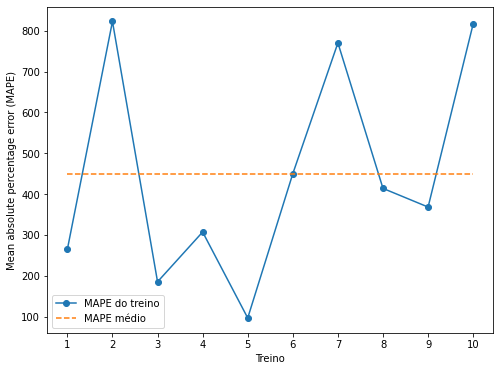

Média do MAPE: 449.4414%
Desvio padrão do MAPE: 251.8057%


In [10]:
anfis_problema_1.exibir_resultado_validacao_multiplos_treinos(10)

#### Estrutura NFN

<u>Parâmetros</u>

In [11]:
m = 120
alfa = 0.8
nfn_problema_1 = NFN(n_epoca, xt, ydt, xv, ydv, m, label_y_validacao, alfa)

<u>Demonstração de estado inicial</u>

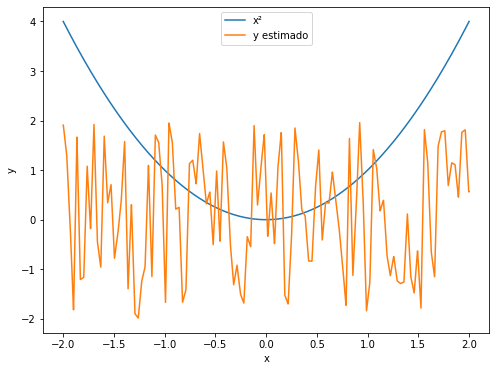

Root mean squared error (RMSE):  1.9177
Mean absolute percentage error (MAPE): 49810.0775%


In [12]:
nfn_problema_1.exibir_resultado_validacao()

<u>Demonstração de treinamento</u>

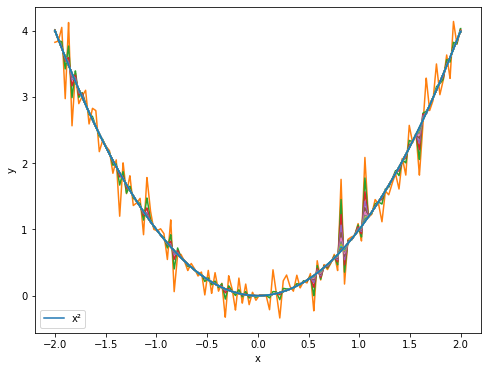

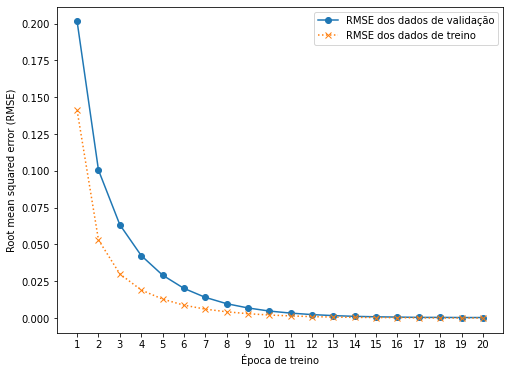

In [13]:
nfn_problema_1.treinar_gradiente(plota_resultado_epocas=True)

<u>Demonstração de resultado final</u>

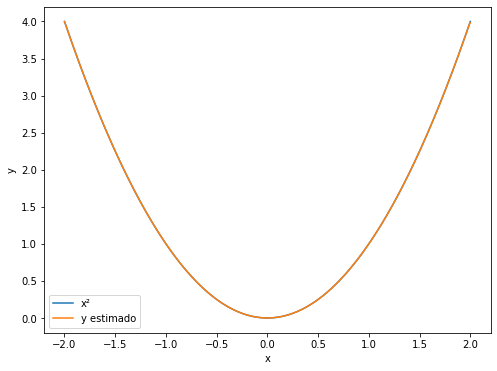

Root mean squared error (RMSE):  0.0004
Mean absolute percentage error (MAPE): 7.9826%


In [14]:
nfn_problema_1.exibir_resultado_validacao()

<u>Resultado médio para 10 treinos</u>

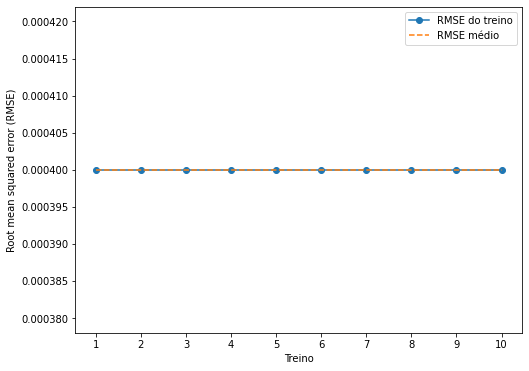

Média do RMSE:  0.0004
Desvio padrão do RMSE:  0.0


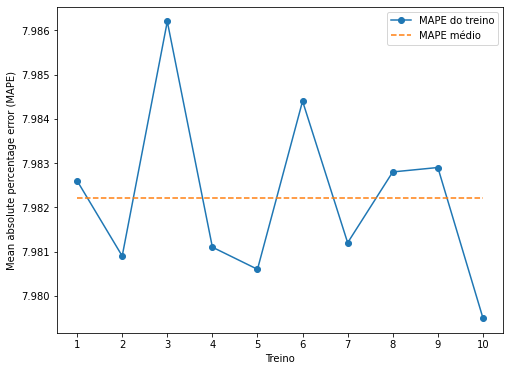

Média do MAPE: 7.9822%
Desvio padrão do MAPE: 0.0019%


In [15]:
nfn_problema_1.exibir_resultado_validacao_multiplos_treinos(10)


## Problema 2: Exemplo 2 do livro texto (modelagem de sistema estático multivariável)

Aproximar a função $f(x, y, z) = 1 + x_{1}^{0,5} + x_{2}^{-1} + x_{3}^{1,5}$.

### Carregamento dos dados de treino e validação

In [16]:
xt = scipy.io.loadmat('xte2.mat')['xte2'].tolist()
ydt = scipy.io.loadmat('ydte2.mat')['ydte2'].T[0].tolist()
xv = scipy.io.loadmat('xve2.mat')['xve2'].tolist()
ydv = scipy.io.loadmat('ydve2.mat')['ydve2'].T[0].tolist()

### Resultado desejado

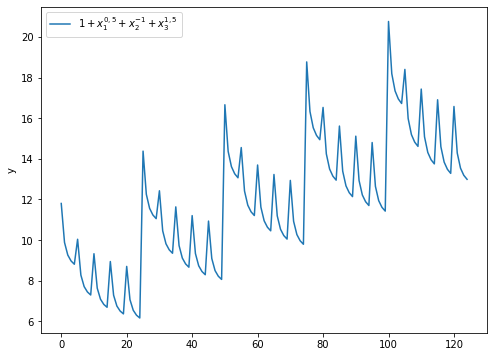

In [17]:
label_y_validacao = "$1 + x_{1}^{0,5} + x_{2}^{-1} + x_{3}^{1,5}$"
exibir_resultado_desejado(xv, ydv, label_y_validacao)

### Resumo dos dados de treino e validação

In [18]:
descrever_dados(xt, ydt, xv, ydv)


===Dataset xt===
     0  1  2
0    4  3  4
1    3  5  2
2    2  3  3
3    2  2  2
4    6  6  2
..  .. .. ..
211  5  4  4
212  2  1  1
213  2  5  3
214  3  6  3
215  2  5  6

[216 rows x 3 columns]

===Dataset yt===
             0
0    11.960069
1    10.795195
2     8.643582
3    10.678301
4    15.758596
..         ...
211  13.039812
212  19.485281
213   7.877361
214   9.555317
215   7.194492

[216 rows x 1 columns]

===Dataset xv===
       0    1    2
0    1.5  1.5  1.5
1    1.5  1.5  2.5
2    1.5  1.5  3.5
3    1.5  1.5  4.5
4    1.5  1.5  5.5
..   ...  ...  ...
120  5.5  5.5  1.5
121  5.5  5.5  2.5
122  5.5  5.5  3.5
123  5.5  5.5  4.5
124  5.5  5.5  5.5

[125 rows x 3 columns]

===Dataset yv===
             0
0    11.804327
1     9.887212
2     9.266741
3     8.977023
4     8.814599
..         ...
120  16.575949
121  14.288463
122  13.540536
123  13.189845
124  12.992807

[125 rows x 1 columns]


### Estruturas implementadas

#### Parâmetros gerais

In [19]:
n_epoca = 20

#### Estrutura ANFIS

<u>Parâmetros</u>

In [20]:
m = 5
alfa = 0.01
anfis_problema_2 = ANFIS(n_epoca, xt, ydt, xv, ydv, m, label_y_validacao, alfa)

<u>Demonstração de estado inicial</u>

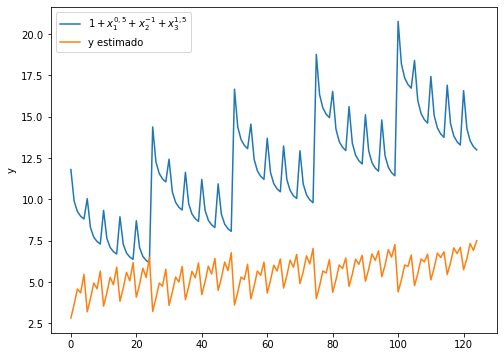

Root mean squared error (RMSE):  7.1365
Mean absolute percentage error (MAPE): 50.0936%


In [21]:
anfis_problema_2.exibir_resultado_validacao()

<u>Demonstração de treinamento</u>

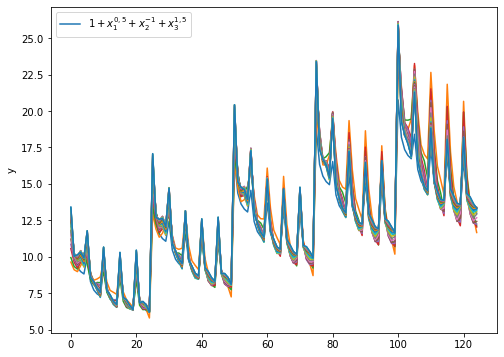

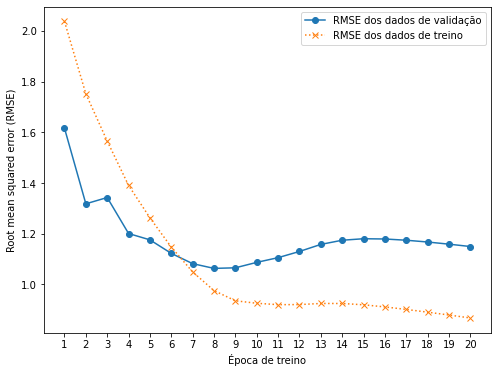

In [22]:
anfis_problema_2.treinar_gradiente(plota_resultado_epocas=True)

<u>Demonstração de resultado final</u>

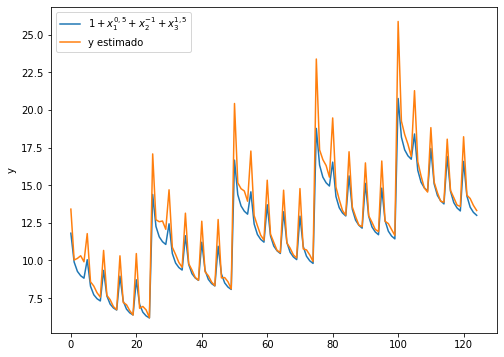

Root mean squared error (RMSE):  1.1496
Mean absolute percentage error (MAPE): 5.5745%


In [23]:
anfis_problema_2.exibir_resultado_validacao()

<u>Resultado médio para 10 treinos</u>

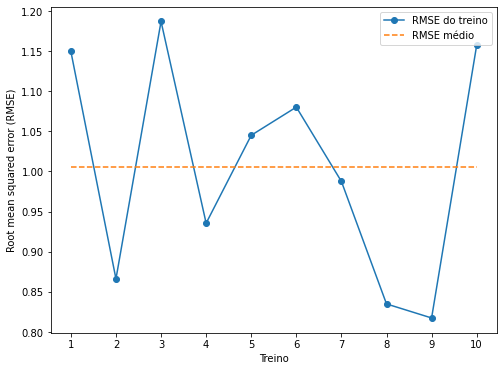

Média do RMSE:  1.0061
Desvio padrão do RMSE:  0.1315


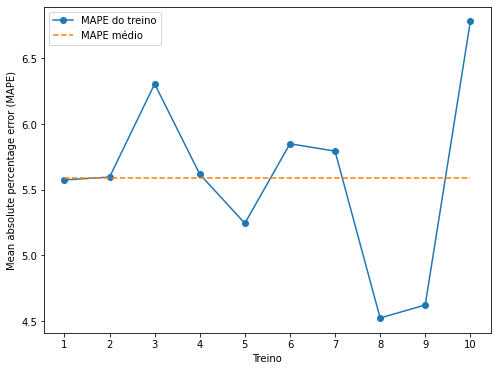

Média do MAPE: 5.5908%
Desvio padrão do MAPE: 0.6504%


In [24]:
anfis_problema_2.exibir_resultado_validacao_multiplos_treinos(10)

#### Estrutura NFN

<u>Parâmetros</u>

In [25]:
m = 5
alfa = 0.01
nfn_problema_2 = NFN(n_epoca, xt, ydt, xv, ydv, m, label_y_validacao, alfa)

<u>Demonstração de estado inicial</u>

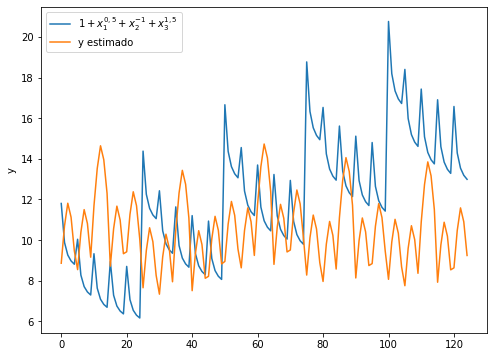

Root mean squared error (RMSE):  4.1896
Mean absolute percentage error (MAPE): 28.6446%


In [26]:
nfn_problema_2.exibir_resultado_validacao()

<u>Demonstração de treinamento</u>

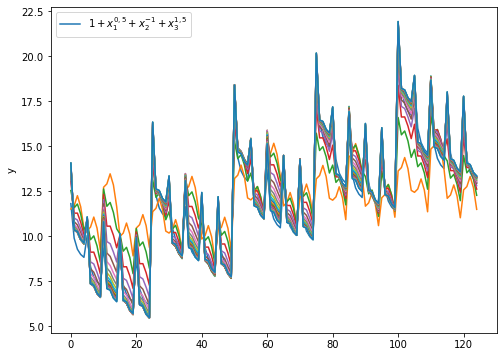

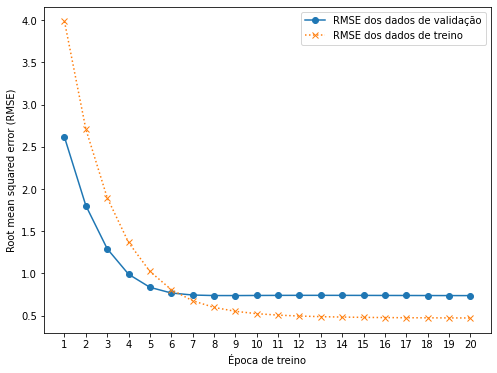

In [27]:
nfn_problema_2.treinar_gradiente(plota_resultado_epocas=True)

<u>Demonstração de resultado final</u>

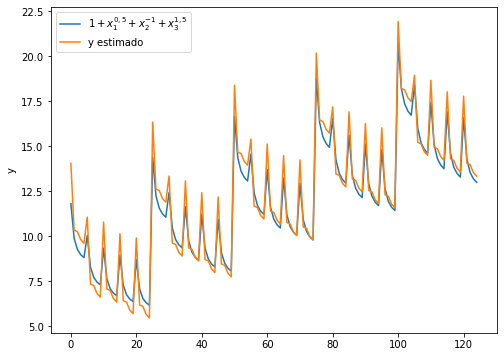

Root mean squared error (RMSE):  0.7369
Mean absolute percentage error (MAPE): 5.1652%


In [28]:
nfn_problema_2.exibir_resultado_validacao()

<u>Resultado médio para 10 treinos</u>

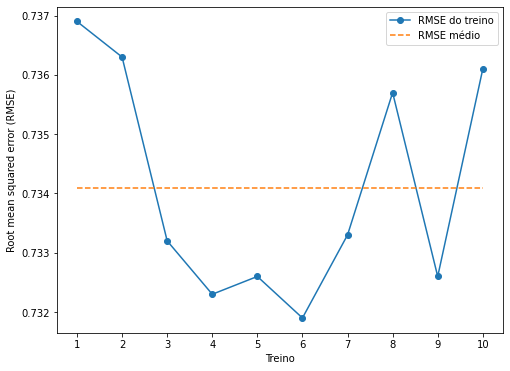

Média do RMSE:  0.7341
Desvio padrão do RMSE:  0.0018


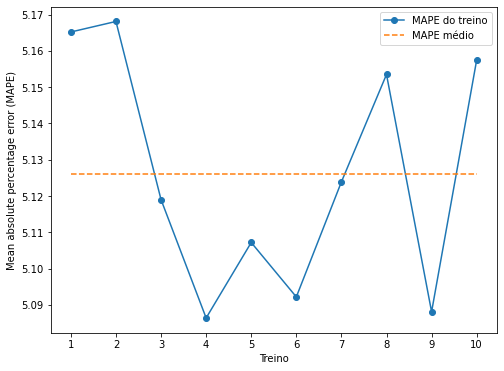

Média do MAPE: 5.1261%
Desvio padrão do MAPE: 0.0310%


In [29]:
nfn_problema_2.exibir_resultado_validacao_multiplos_treinos(10)

## Problema 3: Modelo de sistema dinâmico

Considere o sistema dinâmico descrito por: $y(k+1) = g[y(k), y(k-1), y(k-2), u(k), u(k-1)]$, onde $g(x_{1}, x_{2}, x_{3}, x_{4}, x_{5}) = \frac{x_{1}x_{2}x_{3}x_{5}(x_{3}-1)+x_{4}}{1+x_{3}^2+x_{4}^2}$ e
$u(k) = \{\begin{array}{ll}sen(2\Pi k/250), \forall  k \leq 500 \\0.8sen(2\Pi k/250) + 0.2sen(2\Pi k/25), \forall k > 500 \end{array}$

$\therefore \hat{y}(k+1) = \hat{g}[\hat{y}(k), \hat{y}(k-1), \hat{y}(k-2), u(k), u(k-1)]$

* Estrutura da rede neurofuzzy
    * cinco entradas $y(k), y(k-1), y(k-2), u(k), u(k-1)$
    * uma saída $y(k+1) = \hat{g}[\cdot ]$
* Metodologia de treinamento sugerida
    * Utilizar cinco mil padrões com $u(k)$ gerado aleatoriamente no intervalo $[-1,1]$.

### Criação dos arquivos de treino e validação

In [30]:
def problema_3_calcular_g(x1, x2, x3, x4, x5):
    g = (x1 * x2 * x3 * x5 * (x3 - 1) + x4) / (1 + x3 ** 2 + x4 ** 2)
    return g


def problema_3_calcular_u(k):
    if k < 0:
        return 0
    elif k <= 500:
        return np.sin((2 * math.pi * k) / 250)
    else:
        return 0.8 * np.sin((2 * math.pi * k) / 250) + 0.2 * np.sin((2 * math.pi * k) / 25)


def problema_3_calcular_y(k, x, yd):
    if k < 0:
        return 0, 0, 0, 0, 0, 0
    elif k < len(yd):
        return yd[k][0], x[k][0], x[k][1], x[k][2], x[k][3], x[k][4]
    else:
        x1, _, _, _, _, _ = problema_3_calcular_y(k - 1, x, yd)
        x2, _, _, _, _, _ = problema_3_calcular_y(k - 2, x, yd)
        x3, _, _, _, _, _ = problema_3_calcular_y(k - 3, x, yd)
        x4 = problema_3_calcular_u(k - 1)
        x5 = problema_3_calcular_u(k - 2)
        y = problema_3_calcular_g(x1, x2, x3, x4, x5)
        return y, x1, x2, x3, x4, x5


def problema_3_criar_arquivos():
    xt = []
    ydt = []
    for k in range(0, 5001):
        y, x1, x2, x3, x4, x5 = problema_3_calcular_y(k, xt, ydt)
        xt.append([x1, x2, x3, x4, x5])
        ydt.append([y])
    xt, ydt = embaralhar_dados(xt, ydt)
    criar_arquivo('xte3.csv', xt)
    criar_arquivo('ydte3.csv', ydt)

    xv = []
    ydv = []
    for k in range(0, 10001):
        y, x1, x2, x3, x4, x5 = problema_3_calcular_y(k, xv, ydv)
        xv.append([x1, x2, x3, x4, x5])
        ydv.append([y])
    criar_arquivo('xve3.csv', xv)
    criar_arquivo('ydve3.csv', ydv)

#### Carregamento dos dados de treino e validação

In [31]:
xt = pd.read_csv('xte3.csv').values.tolist()
ydt = pd.read_csv('ydte3.csv').iloc[:, 0].tolist()
xv = pd.read_csv('xve3.csv').values.tolist()
ydv = pd.read_csv('ydve3.csv').iloc[:, 0].tolist()

#### Resultado desejado

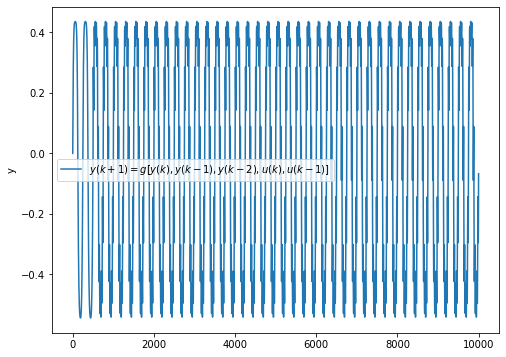

In [32]:
label_y_validacao = "$y(k+1) = g[y(k), y(k-1), y(k-2), u(k), u(k-1)]$"
exibir_resultado_desejado(xv, ydv, label_y_validacao)

### Resumo dos dados de treino e validação

In [33]:
descrever_dados(xt, ydt, xv, ydv)


===Dataset xt===
             0         1         2         3         4
0    -0.446678 -0.435928 -0.429134 -0.680864 -0.642804
1     0.021002  0.055787  0.078425 -0.025314  0.021197
2    -0.178104 -0.208557 -0.245899 -0.168059 -0.195192
3    -0.287780 -0.331321 -0.373264 -0.283230 -0.340765
4     0.244241  0.227010  0.208546  0.297042  0.272952
...        ...       ...       ...       ...       ...
4995  0.383368  0.379683  0.379485  0.612949  0.595618
4996 -0.374514 -0.345878 -0.307980 -0.512466 -0.467202
4997  0.293578  0.287271  0.287305  0.380735  0.363944
4998  0.434077  0.434982  0.435461  0.951010  0.975854
4999  0.432227  0.428600  0.422905  0.914215  0.868656

[5000 rows x 5 columns]

===Dataset yt===
             0
0    -0.459800
1    -0.025145
2    -0.156405
3    -0.245899
4     0.260261
...        ...
4995  0.389898
4996 -0.395474
4997  0.305050
4998  0.432518
4999  0.434292

[5000 rows x 1 columns]

===Dataset xv===
             0         1         2         3         4
0

### Estruturas implementadas

#### Parâmetros gerais

In [34]:
n_epoca = 20

#### Estrutura ANFIS

<u>Parâmetro</u>

In [35]:
m = 5
alfa = 0.2
anfis_problema_3 = ANFIS(n_epoca, xt, ydt, xv, ydv, m, label_y_validacao, alfa)

<u>Demonstração de estado inicial</u>

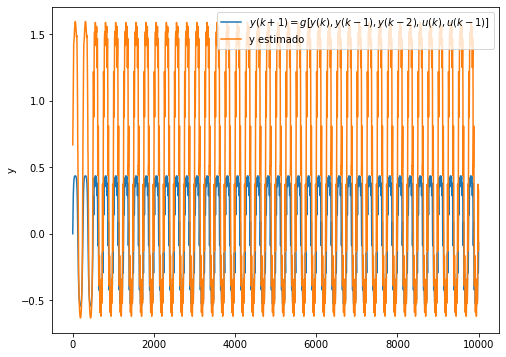

Root mean squared error (RMSE):  0.7277
Mean absolute percentage error (MAPE): 71679.5019%


In [36]:
anfis_problema_3.exibir_resultado_validacao()

<u>Demonstração de treinamento</u>

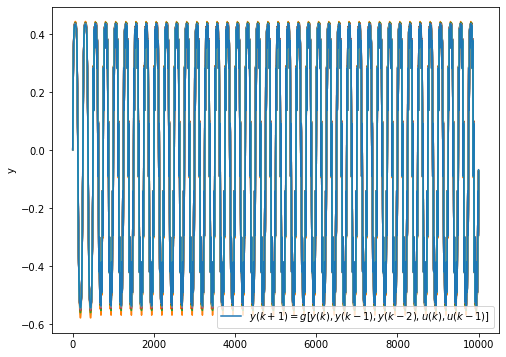

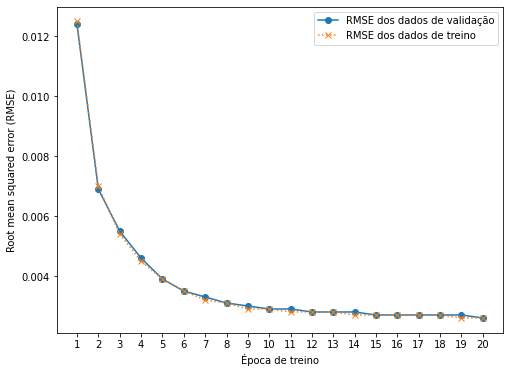

In [37]:
anfis_problema_3.treinar_gradiente(plota_resultado_epocas=True)

<u>Demonstração de resultado final</u>

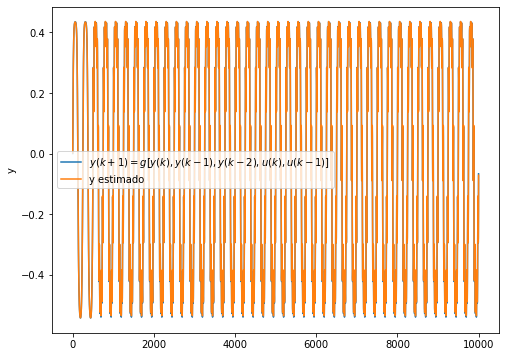

Root mean squared error (RMSE):  0.0026
Mean absolute percentage error (MAPE): 174.8272%


In [38]:
anfis_problema_3.exibir_resultado_validacao()

<u>Resultado médio para 10 treinos</u>

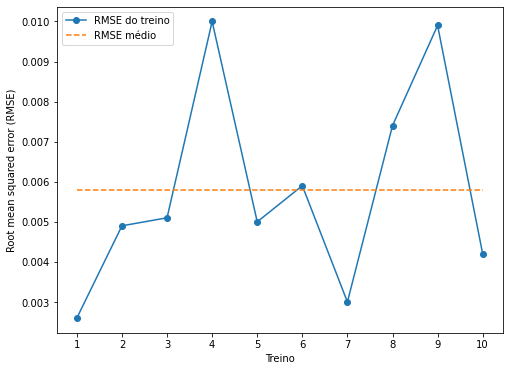

Média do RMSE:  0.0058
Desvio padrão do RMSE:  0.0024


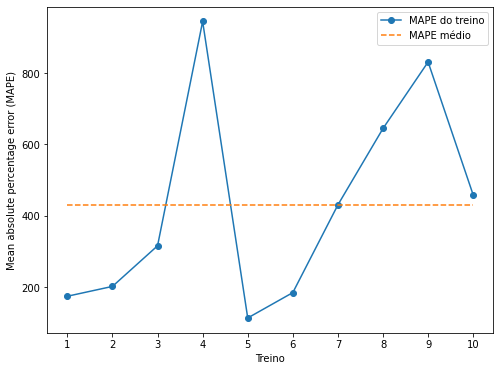

Média do MAPE: 430.1932%
Desvio padrão do MAPE: 276.0701%


In [39]:
anfis_problema_3.exibir_resultado_validacao_multiplos_treinos(10)


#### Estrutura NFN

<u>Parâmetro</u>

In [40]:
m = 100
alfa = 0.4
nfn_problema_3 = NFN(n_epoca, xt, ydt, xv, ydv, m, label_y_validacao, alfa)

<u>Demonstração de estado inicial</u>

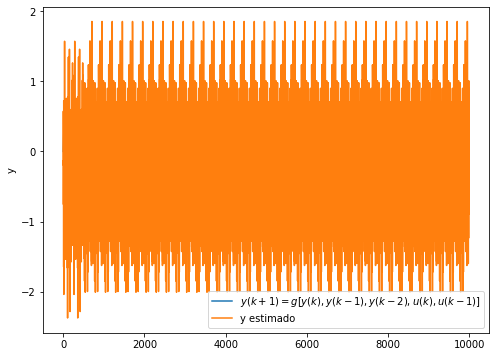

Root mean squared error (RMSE):  0.9538
Mean absolute percentage error (MAPE): 86086.7083%


In [41]:
nfn_problema_3.exibir_resultado_validacao()

<u>Demonstração de treinamento</u>

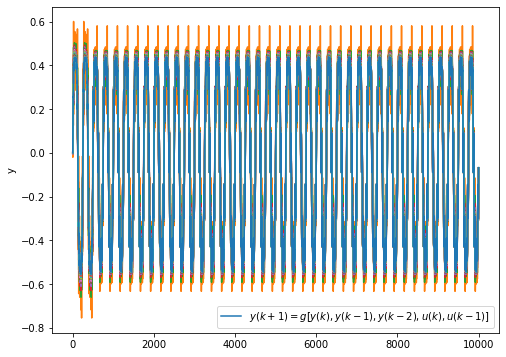

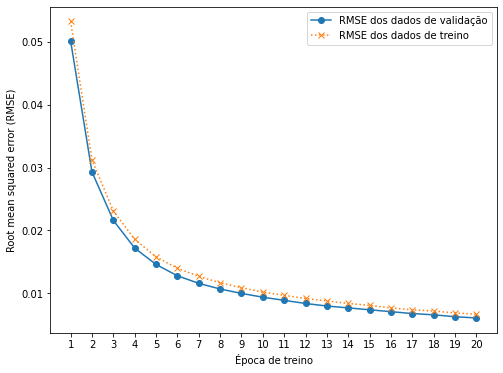

In [42]:
nfn_problema_3.treinar_gradiente(plota_resultado_epocas=True)

<u>Demonstração de resultado final</u>

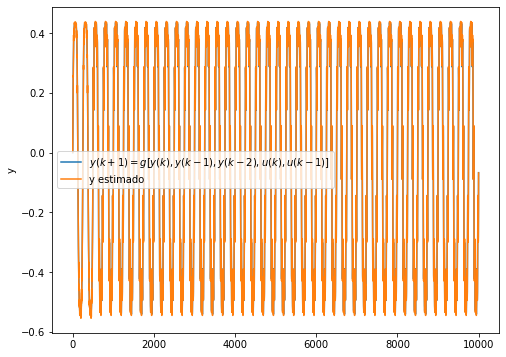

Root mean squared error (RMSE):  0.0061
Mean absolute percentage error (MAPE): 107.0212%


In [43]:
nfn_problema_3.exibir_resultado_validacao()

<u>Resultado médio para 10 treinos</u>

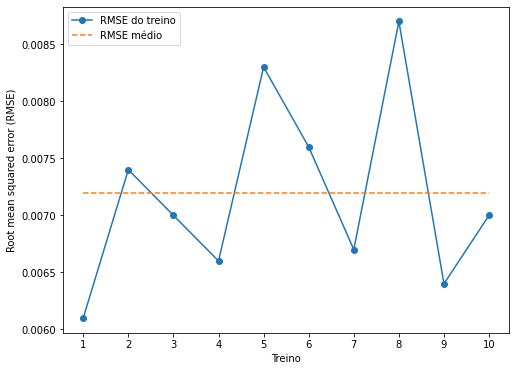

Média do RMSE:  0.0072
Desvio padrão do RMSE:  0.0008


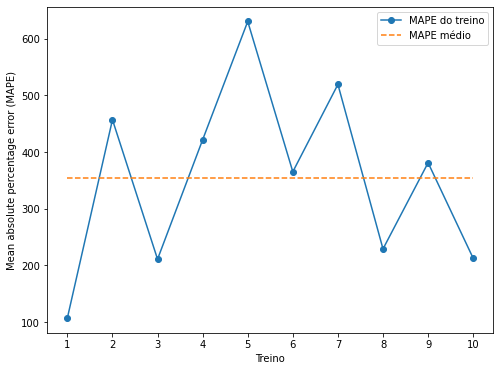

Média do MAPE: 353.4722%
Desvio padrão do MAPE: 154.0003%


In [44]:
nfn_problema_3.exibir_resultado_validacao_multiplos_treinos(10)


## Problema 4: Exemplo 4 do livro texto (previsão de séries temporais)

Este problema é o exemplo 4 do capítulo 12 do livro texto da disciplina. Esse consiste em
aproximação de uma série temporal caótica descrita pela seguinte função:

$\dot{x} = \frac{0.2x(t - \tau)}{1+x^{10}(t-\tau)} - 0.1x(t)$

As entradas desse problema são variáveis x(t), x(t-6), x(t-12) e x(t-18) e saída x(t+6).

$[x(t-18), x(t-12), x(t-6), x(t); x(t+6)]$

<b>utilizar os arquivos disponibilizados.

### Criação dos arquivos de treino e validação

In [45]:
def problema_4_criar_arquivos():
    dados_mg = pd.read_csv("mgdata.dat.txt", sep=" ", header=None, names=['indice', 'valor'])

    x1 = atrasar(dados_mg.valor, 18)
    x2 = atrasar(dados_mg.valor, 12)
    x3 = atrasar(dados_mg.valor, 6)
    x4 = atrasar(dados_mg.valor, 0)
    y = avancar(dados_mg.valor, 6)

    x1 = ajustar(x1, 18, 6)
    x2 = ajustar(x2, 18, 6)
    x3 = ajustar(x3, 18, 6)
    x4 = ajustar(x4, 18, 6)
    y = ajustar(y, 18, 6)

    x = np.array([x1, x2, x3, x4]).T

    limite_amostra_treino = 301

    xt = x[:limite_amostra_treino]
    ydt = y[:limite_amostra_treino]
    xt, ydt = embaralhar_dados(xt, ydt)

    xv = x[limite_amostra_treino:]
    ydv = y[limite_amostra_treino:]

    criar_arquivo('xte4.csv', xt)
    criar_arquivo('ydte4.csv', ydt)
    criar_arquivo('xve4.csv', xv)
    criar_arquivo('ydve4.csv', ydv)

### Carregamento dos dados de treino e validação

In [46]:
xt = pd.read_csv('xte4.csv').values.tolist()
ydt = pd.read_csv('ydte4.csv').iloc[:, 0].tolist()
xv = pd.read_csv('xve4.csv').values.tolist()
ydv = pd.read_csv('ydve4.csv').iloc[:, 0].tolist()

### Resultado desejado

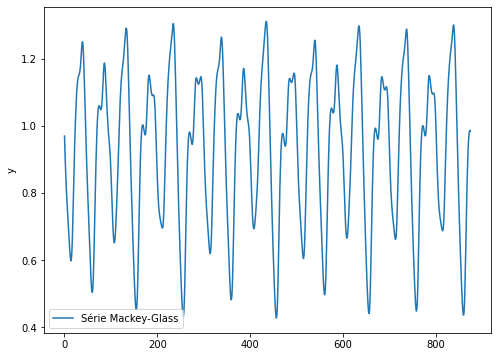

In [47]:
label_y_validacao = "Série Mackey-Glass"
exibir_resultado_desejado(xv, ydv, label_y_validacao)

### Resumo dos dados de treino e validação

In [48]:
descrever_dados(xt, ydt, xv, ydv)


===Dataset xt===
            0         1         2         3
0    0.219220  0.655619  0.790330  0.675245
1    0.853817  0.565929  0.425606  0.741983
2    1.313696  1.084148  0.748416  0.492962
3    0.991405  1.143858  1.125572  1.121762
4    1.162239  1.041191  0.961373  0.735436
..        ...       ...       ...       ...
295  1.004313  0.776007  0.652640  0.697366
296  0.741983  0.971732  0.938761  1.064101
297  0.586417  0.937260  0.967452  0.991405
298  1.200000  0.658574  0.361433  0.246463
299  1.125572  1.121762  0.869387  0.711727

[300 rows x 4 columns]

===Dataset yt===
            0
0    0.830922
1    0.971732
2    0.474057
3    0.869387
4    0.725485
..        ...
295  1.014423
296  1.136291
297  1.143858
298  0.710732
299  0.621204

[300 rows x 1 columns]

===Dataset xv===
            0         1         2         3
0    0.942809  1.123405  1.131148  1.162401
1    0.959995  1.137060  1.132844  1.156239
2    0.988265  1.141552  1.137804  1.138207
3    1.024910  1.140181  1

### Estruturas implementadas



#### Parâmetros gerais

In [49]:
n_epoca = 20

#### Estrutura ANFIS

<u>Parâmetros</u>

In [50]:
m = 8
alfa = 0.01
anfis_problema_4 = ANFIS(n_epoca, xt, ydt, xv, ydv, m, label_y_validacao, alfa)

<u>Demonstração de estado inicial</u>

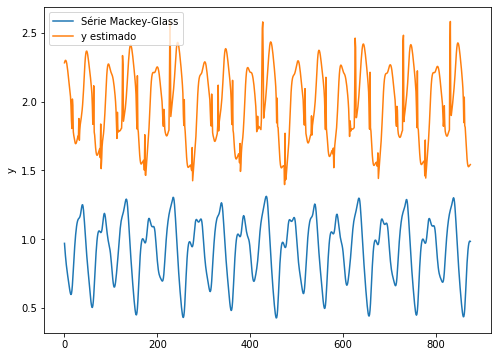

Root mean squared error (RMSE):  1.1197
Mean absolute percentage error (MAPE): 132.0622%


In [51]:
anfis_problema_4.exibir_resultado_validacao()

<u>Demonstração de treinamento</u>

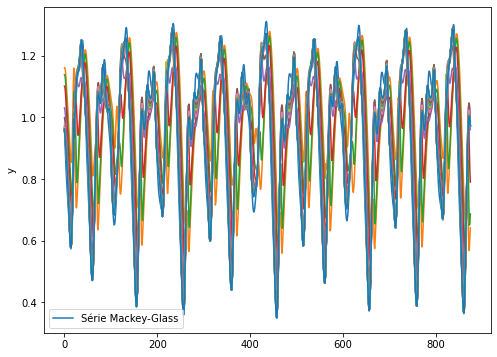

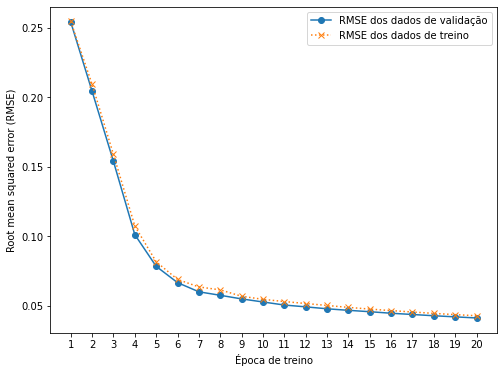

In [52]:
anfis_problema_4.treinar_gradiente(plota_resultado_epocas=True)

<u>Demonstração de resultado final</u>

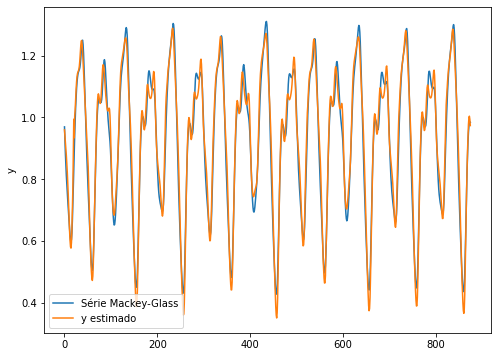

Root mean squared error (RMSE):  0.0413
Mean absolute percentage error (MAPE): 4.0194%


In [53]:
anfis_problema_4.exibir_resultado_validacao()

<u>Resultado médio para 10 treinos</u>

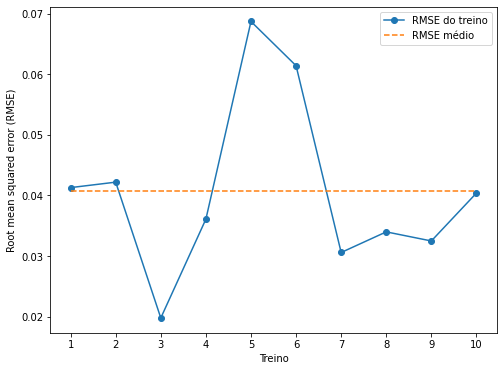

Média do RMSE:  0.0407
Desvio padrão do RMSE:  0.0137


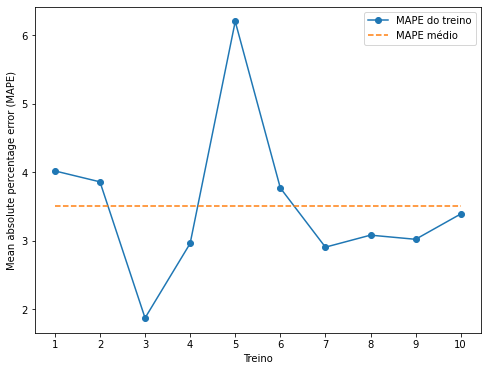

Média do MAPE: 3.5082%
Desvio padrão do MAPE: 1.0719%


In [54]:
anfis_problema_4.exibir_resultado_validacao_multiplos_treinos(10)

### Estrutura NFN

<u>Parâmetros</u>

In [55]:
m = 8
alfa = 0.3
nfn_problema_4 = NFN(n_epoca, xt, ydt, xv, ydv, m, label_y_validacao, alfa)

<u>Demonstração de estado inicial</u>

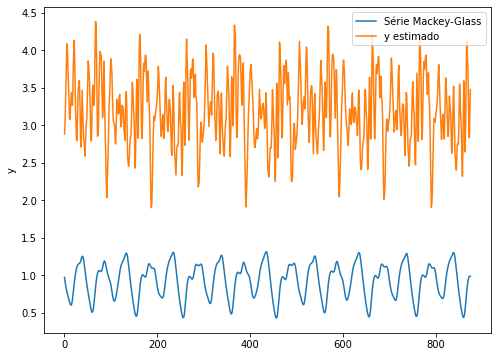

Root mean squared error (RMSE):  2.3286
Mean absolute percentage error (MAPE): 272.6307%


In [56]:
nfn_problema_4.exibir_resultado_validacao()

<u>Demonstração de treinamento</u>

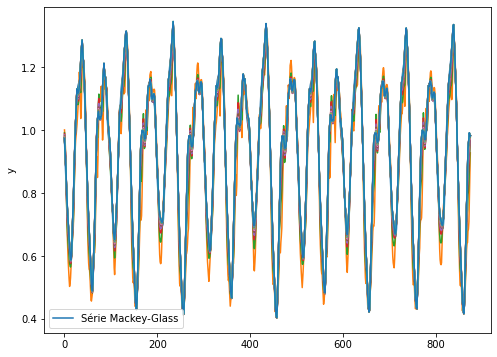

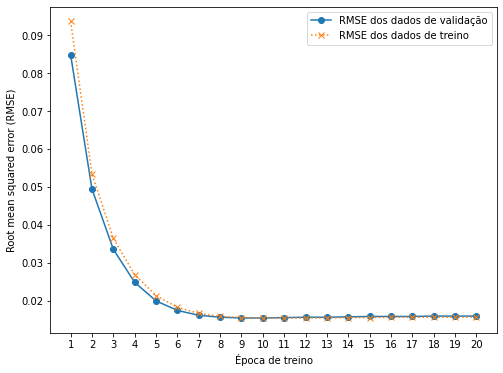

In [57]:
nfn_problema_4.treinar_gradiente(plota_resultado_epocas=True)

<u>Demonstração de resultado final</u>

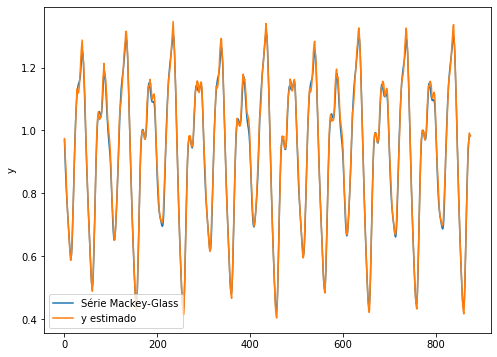

Root mean squared error (RMSE):  0.0159
Mean absolute percentage error (MAPE): 1.3533%


In [58]:
nfn_problema_4.exibir_resultado_validacao()

<u>Resultado médio para 10 treinos</u>

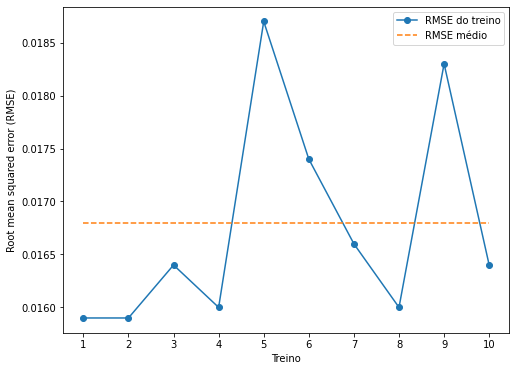

Média do RMSE:  0.0168
Desvio padrão do RMSE:  0.001


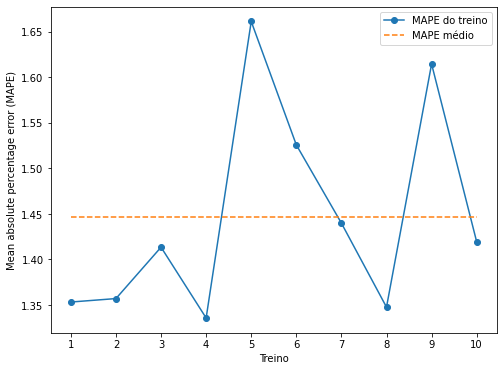

Média do MAPE: 1.4468%
Desvio padrão do MAPE: 0.1101%


In [59]:
nfn_problema_4.exibir_resultado_validacao_multiplos_treinos(10)

## Problema 5: Escolha um problema de regressão no repositório: https://archive.ics.uci.edu/ml/datasets

Problema escolhido: Metro Interstate Traffic Volume Data Set (https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

O objetivo proposto neste problema é prever com 24 horas de antecedência o número de pessoas que vão deslocar entre duas estações de metrô de Minneapolis (EUA).

Para isso a seguinte fórmula para previsão de série temporal foi experimentada:

$y(k+24) = g[y(k),y(k-24),y(k-144)]$,

onde $x_{1}$ representa o volume passageiros registrado na hora atual, $x_{2}$ representa o volume de passageiros um dia atrás e $x_{3}$ representa o volume de passageiros uma semana antes da data que se pretende prever.

### Data set

A base de dados é composta pelo volume de tráfego por hora entre 2 estações de metrô de Minneapolis. Os dados correspondem ao período de 2012 até 2018.

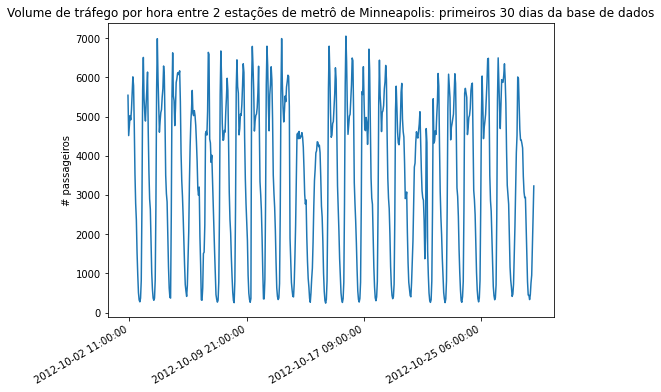

In [60]:
dados_metro = pd.read_csv("Metro_Interstate_Traffic_Volume.csv", sep=",")

plt.figure(figsize=(8, 6))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=168))
plt.plot(dados_metro[:720].date_time, dados_metro[:720].traffic_volume, label='# passageiros por hora')
plt.gcf().autofmt_xdate()
plt.ylabel('# passageiros')
plt.title('Volume de tráfego por hora entre 2 estações de metrô de Minneapolis: primeiros 30 dias da base de dados')
plt.show()

### Criação dos arquivos de treino e validação

In [61]:
def problema_5_criar_arquivos():
    dados_metro = pd.read_csv("Metro_Interstate_Traffic_Volume.csv", sep=",")

    x1 = atrasar(dados_metro.traffic_volume, 0)
    x2 = atrasar(dados_metro.traffic_volume, 24)
    x3 = atrasar(dados_metro.traffic_volume, 144)
    y = avancar(dados_metro.traffic_volume, 24)

    x1 = ajustar(x1, 144, 24)
    x2 = ajustar(x2, 144, 24)
    x3 = ajustar(x3, 144, 24)
    y = ajustar(y, 144, 24)

    x = np.array([x1, x2, x3]).T

    criar_arquivo('x5_desnormalizado.csv', x)
    criar_arquivo('y5_desnormalizado.csv', y)

    minimo = min(x.min(), min(y))
    maximo = max(x.max(), max(y))

    x_nomalizado = normalizar(x, minimo, maximo)
    y_normalizado = normalizar(y, minimo, maximo)

    tamanho_amostra_treino = 24 * 30 * 12 * 4

    xt = x_nomalizado[:tamanho_amostra_treino]
    ydt = y_normalizado[:tamanho_amostra_treino]
    xt, ydt = embaralhar_dados(xt, ydt)
    criar_arquivo('xte5.csv', xt)
    criar_arquivo('ydte5.csv', ydt)

    criar_arquivo('xte5_desnormalizado.csv', desnormalizar(xt, minimo, maximo).astype(int))
    criar_arquivo('ydte5_desnormalizado.csv', desnormalizar(ydt, minimo, maximo).astype(int))

    xv = x_nomalizado[tamanho_amostra_treino:]
    ydv = y_normalizado[tamanho_amostra_treino:]
    criar_arquivo('xve5.csv', xv)
    criar_arquivo('ydve5.csv', ydv)

    criar_arquivo('xve5_desnormalizado.csv', desnormalizar(xv, minimo, maximo).astype(int))
    criar_arquivo('ydve5_desnormalizado.csv', desnormalizar(ydv, minimo, maximo).astype(int))

### Carregamento dos dados de treino e validação

In [62]:
xt = pd.read_csv('xte5.csv').values.tolist()
ydt = pd.read_csv('ydte5.csv').iloc[:, 0].tolist()
xv = pd.read_csv('xve5.csv').values.tolist()
ydv = pd.read_csv('ydve5.csv').iloc[:, 0].tolist()

x = pd.read_csv('x5_desnormalizado.csv').values
y = pd.read_csv('y5_desnormalizado.csv').values
minimo = min(x.min(), y.min())
maximo = max(x.max(), y.max())

### Resultado desejado

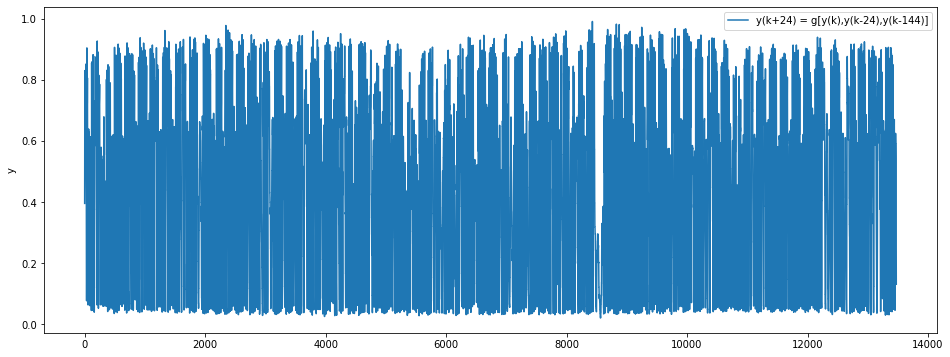

In [63]:
label_y_validacao = "y(k+24) = g[y(k),y(k-24),y(k-144)]"
exibir_resultado_desejado(xv, ydv, label_y_validacao)

### Resumo dos dados de treino e validação

In [64]:
descrever_dados(xt, ydt, xv, ydv)


===Dataset xt===
              0         1         2
0      0.905220  0.639286  0.615934
1      0.409753  0.382967  0.657692
2      0.482418  0.082692  0.624725
3      0.718407  0.202198  0.326786
4      0.684890  0.739835  0.239148
...         ...       ...       ...
34554  0.101236  0.169093  0.707005
34555  0.037500  0.221566  0.592995
34556  0.474451  0.045604  0.102885
34557  0.047115  0.056319  0.850549
34558  0.469780  0.347940  0.040247

[34559 rows x 3 columns]

===Dataset yt===
              0
0      0.328846
1      0.359478
2      0.441621
3      0.108654
4      0.320604
...         ...
34554  0.745055
34555  0.779945
34556  0.657967
34557  0.048214
34558  0.436538

[34559 rows x 1 columns]

===Dataset xv===
              0         1         2
0      0.809066  0.778159  0.802747
1      0.903709  0.826786  0.623901
2      0.830632  0.691346  0.486401
3      0.685027  0.691346  0.472390
4      0.611264  0.607692  0.454945
...         ...       ...       ...
13470  0.405220  0

### Estruturas implementadas


#### Parâmetros gerais

In [65]:
n_epoca = 20

#### Estrutura ANFIS

<u>Parâmetros</u>

In [66]:
m = 12
alfa = 0.1
anfis_problema_5 = ANFIS(n_epoca, xt, ydt, xv, ydv, m, label_y_validacao, alfa)

<u>Demonstração de estado inicial</u>

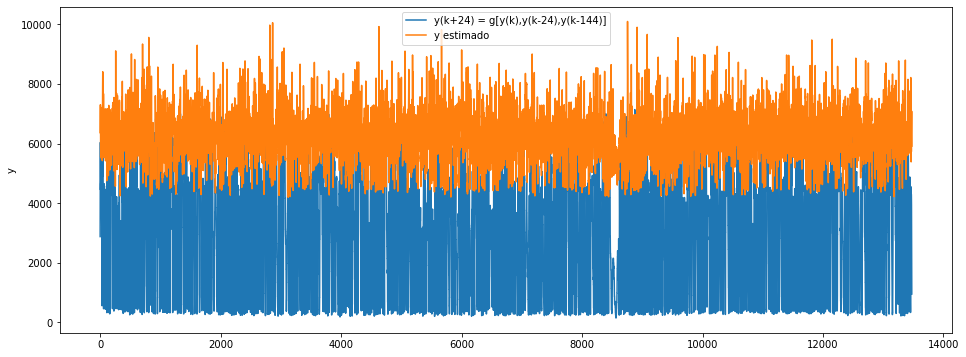

Root mean squared error (RMSE):  3466.6835
Mean absolute percentage error (MAPE): 330.3883%


In [67]:
anfis_problema_5.exibir_resultado_validacao(True, minimo, maximo)

<u>Demonstração de treinamento</u>

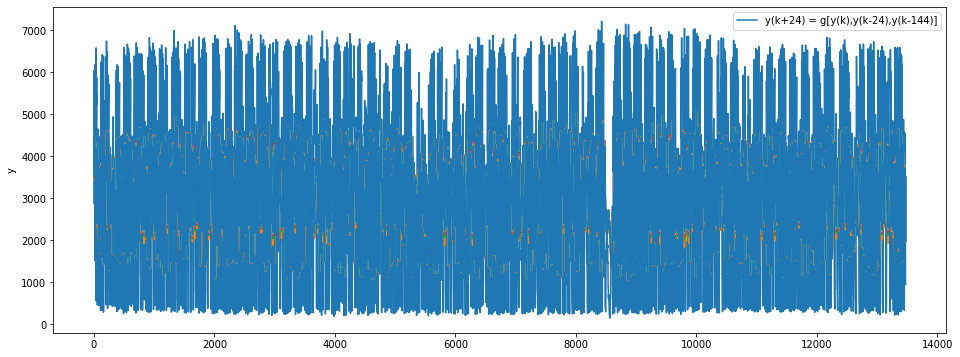

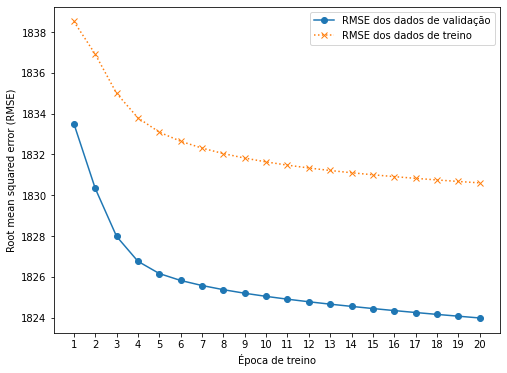

In [68]:
anfis_problema_5.treinar_gradiente(plota_resultado_epocas=True,
                                   desnormalizar_apresentacao_resultado=True,
                                   minimo_desnomalizacao=minimo,
                                   maximo_desnomalizacao=maximo)


<u>Demonstração de resultado final</u>

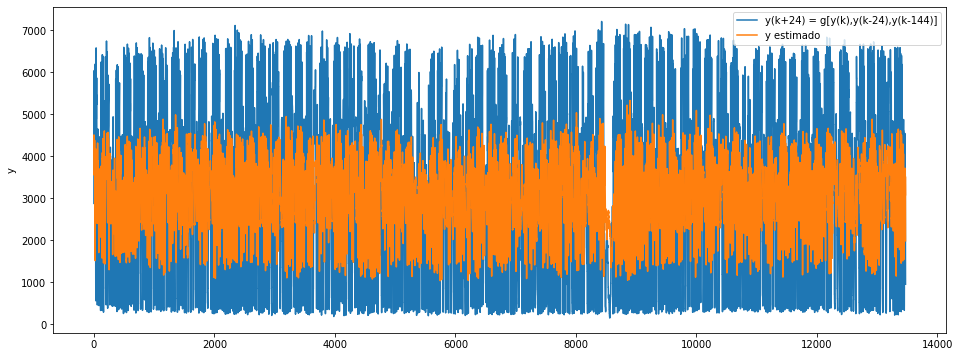

Root mean squared error (RMSE):  1823.9816
Mean absolute percentage error (MAPE): 136.2210%


In [69]:
anfis_problema_5.exibir_resultado_validacao(True, minimo, maximo)

<u>Resultado médio para 10 treinos</u>

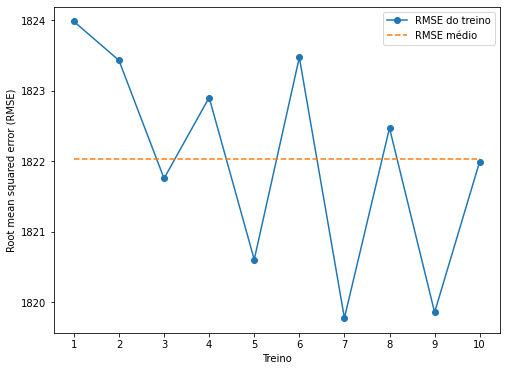

Média do RMSE:  1822.0256
Desvio padrão do RMSE:  1.4384


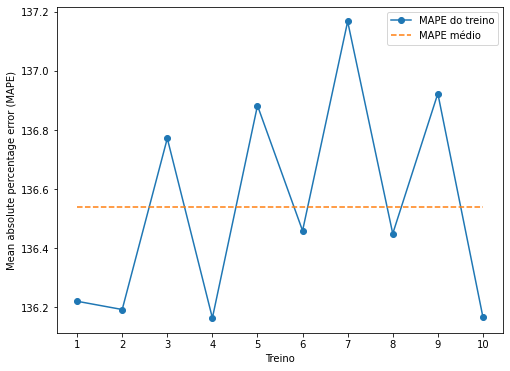

Média do MAPE: 136.5400%
Desvio padrão do MAPE: 0.3504%


In [70]:
anfis_problema_5.exibir_resultado_validacao_multiplos_treinos(10, True, minimo, maximo)

### Estrutura NFN

<u>Parâmetros</u>

In [71]:
m = 12
alfa = 0.1

nfn_problema_5 = NFN(n_epoca, xt, ydt, xv, ydv, m, label_y_validacao, alfa)

<u>Demonstração do estado inicial</u>

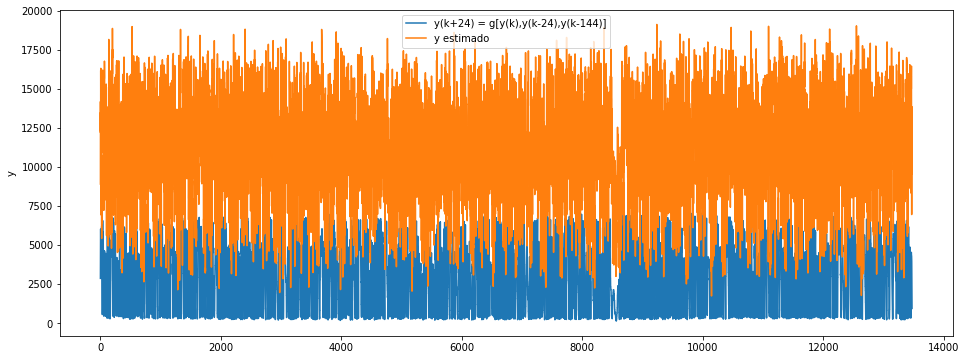

Root mean squared error (RMSE):  8597.779
Mean absolute percentage error (MAPE): 671.2134%


In [72]:
nfn_problema_5.exibir_resultado_validacao(True, minimo, maximo)

<u>Demonstração de treinamento</u>

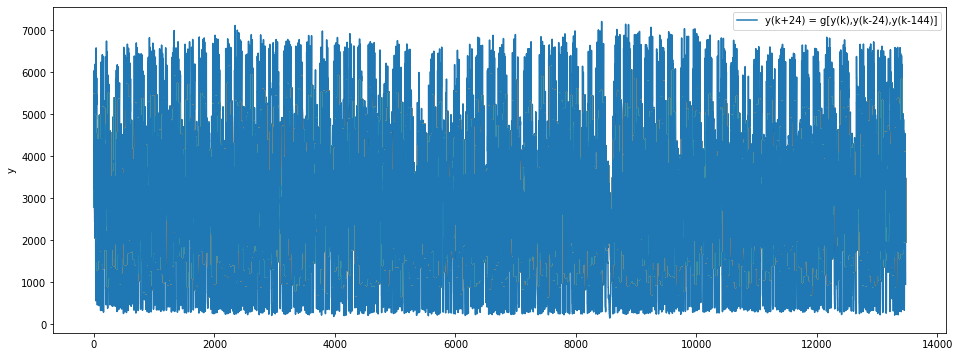

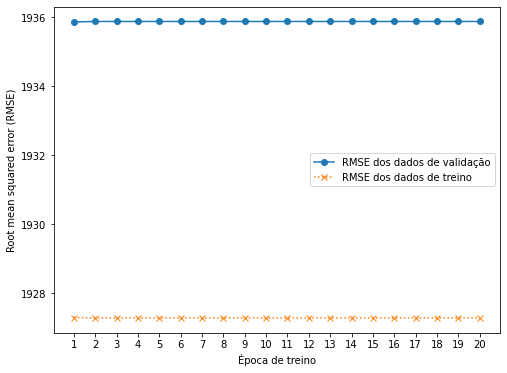

In [73]:
nfn_problema_5.treinar_gradiente(plota_resultado_epocas=True,
                                 desnormalizar_apresentacao_resultado=True,
                                 minimo_desnomalizacao=minimo,
                                 maximo_desnomalizacao=maximo)

<u>Demonstração de resultado final</u>

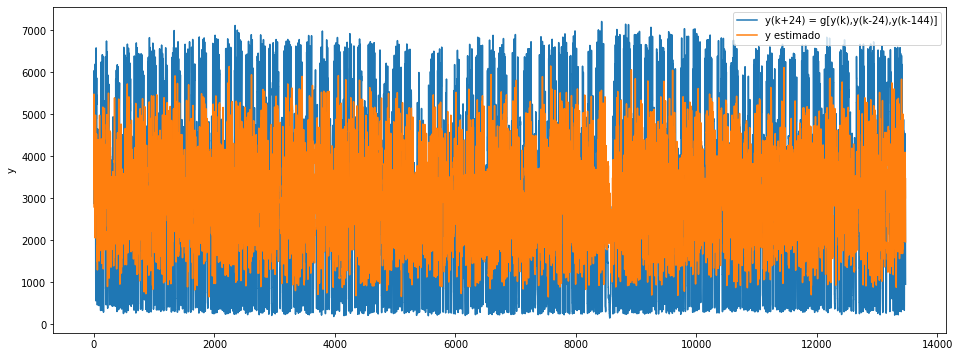

Root mean squared error (RMSE):  1935.8699
Mean absolute percentage error (MAPE): 134.6726%


In [74]:
nfn_problema_5.exibir_resultado_validacao(True, minimo, maximo)

<u>Resultado médio para 10 treinos</u>

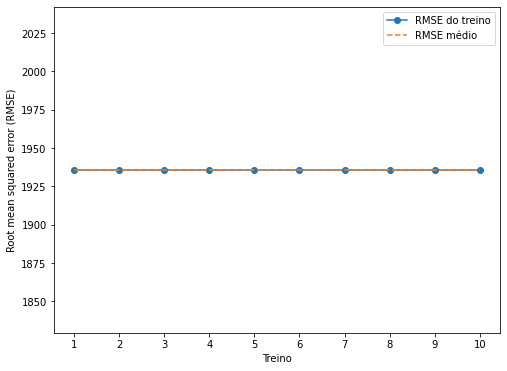

Média do RMSE:  1935.8699
Desvio padrão do RMSE:  0.0


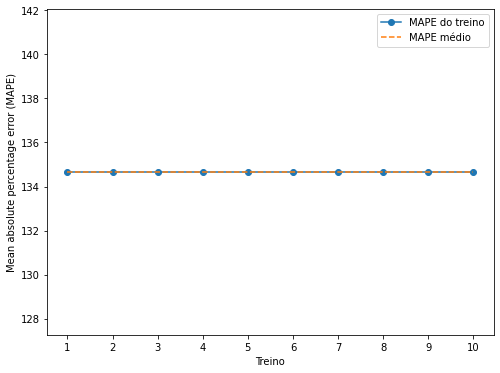

Média do MAPE: 134.6726%
Desvio padrão do MAPE: 0.0000%


In [75]:
nfn_problema_5.exibir_resultado_validacao_multiplos_treinos(numero_treinos=10, desnormalizar_resultado=True, minimo_desnomalizacao=minimo, maximo_desnomalizacao=maximo)

## Referências

Chiu, Stephen L. "Fuzzy model identification based on cluster estimation." Journal of Intelligent & fuzzy systems 2.3 (1994): 267-278.

Ghosh, S., and Dubey, S. K. . "Comparative analysis of k-means and fuzzy c-means algorithms." International Journal of Advanced Computer Science and Applications 4.4 (2013).